<a href="https://colab.research.google.com/github/marco-bellini/Starbucks_capstone/blob/master/02_EDA_offers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from capstone_data_eng import *

import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [5]:
out, profile_all, portfolio, offers_all, transactions_all, transactions_during_offer, transactions_outside_offer = load_data_cv(
        person_split=None, rename_offers=True, time_split_min=None, time_split_max=None,
        add_transactions=False, skip_overlap=False, skip_add_purchases=False, calc_net_offer_time=True,
        assign_to='ignore', location='colab')

/content/capstone_data_eng.py:741: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  profile_all = load_profile(location=location)


offer received     76277
offer viewed       57725
offer completed    33579
Name: event, dtype: int64
er,ec,ev
(76277, 3) (33579, 4) (57725, 3)
er  (76277, 6)
persons with no offers received in timeframe:  6
transactions_during_offer.shape: (122652, 7)
(76277, 27)
add_stats_by_person:
(76277, 38)
(76277, 44)
(76277, 50)
(76277, 51)
(76277, 60)


In [6]:
out.columns

Index(['person', 'offer', 'offer_received', 'offer_viewed', 'offer_completed',
       'reward', 'offer_end', 'difficulty', 'duration', 'offer_type', 'web',
       'email', 'mobile', 'social', 'offer_reward', 'duration_hours',
       'duration_viewed', 'duration_effective', 'viewed', 'rewarded',
       'received', 'comp_not_viewed', 'completed', 'Tpay_offer', 'Npay_offer',
       'Maxpay_offer', 'Minpay_offer', 'Netpay_offer', 'Avg_pay_offer', 'age',
       'became_member_on', 'gender', 'income', 'joined_year', 'joined_month',
       'joined_week', 'gender_num', 'user_time', 'Tpay_out', 'Npay_out',
       'p_c_r_ratio', 'p_cnv_r_ratio', 'p_c_v_ratio', 'overlaps',
       'Tpay_offers_tot', 'Npay_offers_tot', 'Maxpay_offers_tot',
       'Minpay_offers_tot', 'Trewards_tot', 'Nrewards_tot',
       'tot_gross_offer_time', 'tot_net_offers_time', 'tot_not_offers_time',
       'Avg_pay_offers', 'Net_pay_offers', 'Avg_net_pay_offers',
       'Avg_pay_outside', 'Avg_D_O', 'Avg_D_OS', 'Avg_D_nOS']

In [0]:
c_drop=['person','offer', 'became_member_on',]

c_bin=['web', 'email', 'mobile', 'social','viewed', 'rewarded',
       'received', 'comp_not_viewed', 'completed']

c_num_time=['offer_received', 'offer_viewed', 'offer_completed', 'offer_end']
c_num_offer=['reward','difficulty', 'duration', 'offer_reward', 'duration_hours',
       'duration_viewed', 'duration_effective', 'overlaps',]
c_num_offer_leak=['Tpay_offer', 'Npay_offer','Maxpay_offer', 'Minpay_offer', 
                  'Netpay_offer', 'Avg_pay_offer', 'income', 'joined_year', 'joined_month',
       'joined_week', 'gender_num', 'user_time',  'p_c_r_ratio', 'p_cnv_r_ratio', 'p_c_v_ratio' ]
c_num_offers_leak=['Tpay_offers_tot', 'Npay_offers_tot', 'Maxpay_offers_tot',
       'Minpay_offers_tot', 'Trewards_tot', 'Nrewards_tot',
       'tot_gross_offer_time', 'tot_net_offers_time', 'tot_not_offers_time',
       'Avg_pay_offers', 'Net_pay_offers', 'Avg_net_pay_offers',
       'Avg_pay_outside', 'Avg_D_O', 'Avg_D_OS', 'Avg_D_nOS']


c_cat_offer=['offer_type', ]
c_num_person=['age', 'Tpay_out', 'Npay_out', ]
c_cat_person=['gender',]



c_all=c_drop+c_bin+c_num_time+c_num_offer+c_num_offer_leak+c_num_offers_leak +\
  c_cat_offer+c_num_person+c_cat_person

In [11]:
print('missing columns from out / c_all')
print( set(out.columns ) ^ set(c_all) )

missing columns from out / c_all
set()


In [0]:
out.loc[out.gender.isna(),'gender']='M'
out.loc[out.income.isna(),'income']=out.income.median()
out[['offer_viewed', 'offer_completed']]=out[['offer_viewed', 'offer_completed']].fillna(-1)

In [19]:
print("columns with nans", list( out.columns[out.isna().any()] ))

columns with nans []


Text(0, 0.5, 'percentage of completed offers')

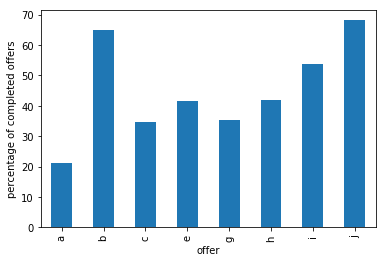

In [57]:
o_cmp_ratio=out.groupby(by='offer')['completed'].value_counts(normalize=True)
o_cmp=o_cmp_ratio.loc[o_cmp_ratio.index.get_level_values('completed')==True,:]
o_cmp=100.*o_cmp.droplevel(level='completed')
o_cmp.plot(kind='bar')
plt.ylabel('percentage of completed offers')


Text(0, 0.5, 'percentage of completed offers')

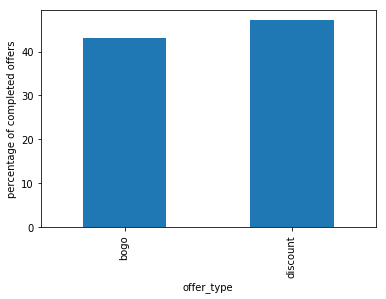

In [59]:
o_cmp_ratio=out.groupby(by='offer_type')['completed'].value_counts(normalize=True)
o_cmp=o_cmp_ratio.loc[o_cmp_ratio.index.get_level_values('completed')==True,:]
o_cmp=100.*o_cmp.droplevel(level='completed')
o_cmp.plot(kind='bar')
plt.ylabel('percentage of completed offers')

Text(0, 0.5, 'percentage of completed offers')

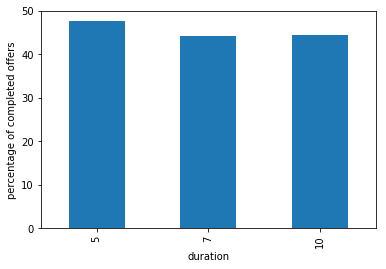

In [62]:
o_cmp_ratio=out.groupby(by='duration')['completed'].value_counts(normalize=True)
o_cmp=o_cmp_ratio.loc[o_cmp_ratio.index.get_level_values('completed')==True,:]
o_cmp=100.*o_cmp.droplevel(level='completed')
o_cmp.plot(kind='bar')
plt.ylabel('percentage of completed offers')

Text(0, 0.5, 'percentage of completed offers')

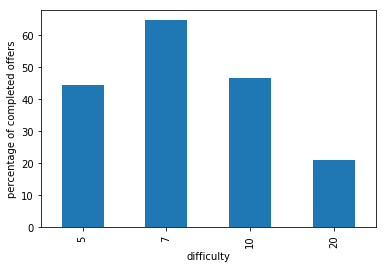

In [63]:
o_cmp_ratio=out.groupby(by='difficulty')['completed'].value_counts(normalize=True)
o_cmp=o_cmp_ratio.loc[o_cmp_ratio.index.get_level_values('completed')==True,:]
o_cmp=100.*o_cmp.droplevel(level='completed')
o_cmp.plot(kind='bar')
plt.ylabel('percentage of completed offers')

Text(0, 0.5, 'percentage of completed offers')

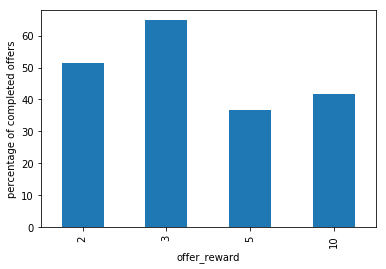

In [69]:
o_cmp_ratio=out.groupby(by='offer_reward')['completed'].value_counts(normalize=True)
o_cmp=o_cmp_ratio.loc[o_cmp_ratio.index.get_level_values('completed')==True,:]
o_cmp=100.*o_cmp.droplevel(level='completed')
o_cmp.plot(kind='bar')
plt.ylabel('percentage of completed offers')

Text(0, 0.5, 'percentage of completed offers')

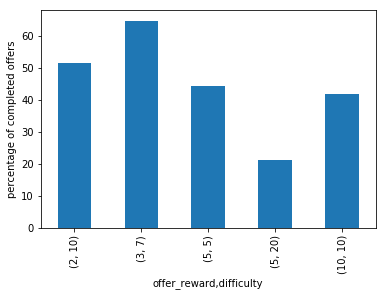

In [76]:
o_cmp_ratio=out.groupby(by=['offer_reward','difficulty'])['completed'].value_counts(normalize=True)
o_cmp=o_cmp_ratio.loc[o_cmp_ratio.index.get_level_values('completed')==True,:]
o_cmp=100.*o_cmp.droplevel(level='completed')
o_cmp.plot(kind='bar')
plt.ylabel('percentage of completed offers')


Text(0, 0.5, 'percentage of completed offers')

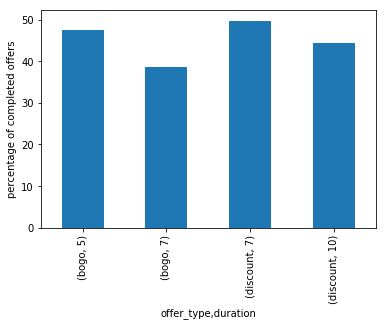

In [74]:
o_cmp_ratio=out.groupby(by=['offer_type','duration'])['completed'].value_counts(normalize=True)
o_cmp=o_cmp_ratio.loc[o_cmp_ratio.index.get_level_values('completed')==True,:]
o_cmp=100.*o_cmp.droplevel(level='completed')
o_cmp.plot(kind='bar')
plt.ylabel('percentage of completed offers')

Text(0.5, 1.0, 'social channel has significant impact')

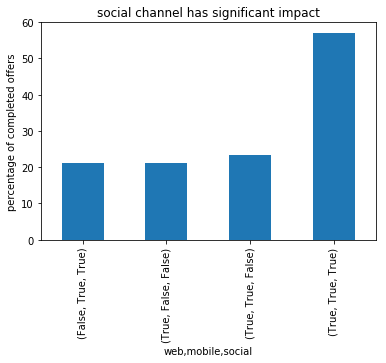

In [78]:
o_cmp_ratio=out.groupby(by=['web','mobile','social'])['completed'].value_counts(normalize=True)
o_cmp=o_cmp_ratio.loc[o_cmp_ratio.index.get_level_values('completed')==True,:]
o_cmp=100.*o_cmp.droplevel(level='completed')
o_cmp.plot(kind='bar')
plt.ylabel('percentage of completed offers')

plt.title('social channel has significant impact')

Text(0.5, 1.0, 'social channel has significant impact')

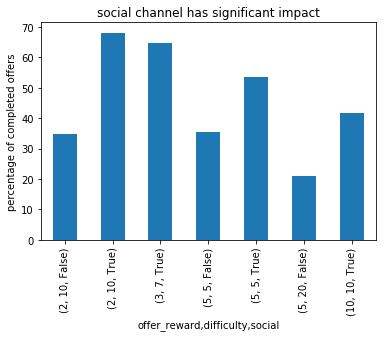

In [79]:
o_cmp_ratio=out.groupby(by=['offer_reward','difficulty','social'])['completed'].value_counts(normalize=True)
o_cmp=o_cmp_ratio.loc[o_cmp_ratio.index.get_level_values('completed')==True,:]
o_cmp=100.*o_cmp.droplevel(level='completed')
o_cmp.plot(kind='bar')
plt.ylabel('percentage of completed offers')

plt.title('social channel has significant impact')

Text(0, 0.5, 'percentage of completed offers')

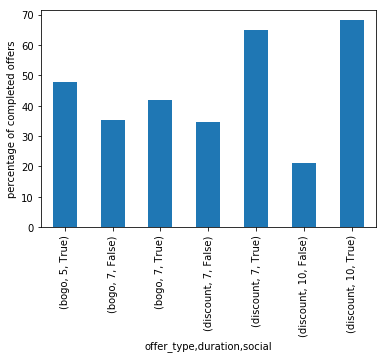

In [80]:
o_cmp_ratio=out.groupby(by=['offer_type','duration','social'])['completed'].value_counts(normalize=True)
o_cmp=o_cmp_ratio.loc[o_cmp_ratio.index.get_level_values('completed')==True,:]
o_cmp=100.*o_cmp.droplevel(level='completed')
o_cmp.plot(kind='bar')
plt.ylabel('percentage of completed offers')